In [1]:
from mdagent import MDAgent


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)


In [3]:
### Parameters
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent_type = "Structured"

### In this demo, we show how MDAgent can be used to make a simulated annealing simulation. 
Two variations: 
 - With user guidance
 - Without user guidance

### This example seems appropiate as said simulation is not currently part of the tool box, so the agent is required to write the simulation on its own, based on working parameters.

# Simulated annealing with user guidance

In [4]:
agent_wo_solvent = MDAgent(agent_type=agent_type, model=llm_var, top_k_tools=tools)

## Initial simulation

In [5]:
agent_wo_solvent.run("Please run the simulation of the protein 1L2Y in vacuum for 10 ns, at 303 K")

Thought: To run the simulation of the protein 1L2Y in vacuum for 10 ns at 303 K, I need to set up the simulation parameters accordingly. This includes downloading the PDB file for 1L2Y, setting up the system in vacuum, and configuring the simulation parameters for a 10 ns run at 303 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1L2Y",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": False,
      "solvate": False
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "303 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 5000000,
      "record_interval_steps": 50000,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```Question: How can I run a simul

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

## Plots and analysis of initial simulation

100
100


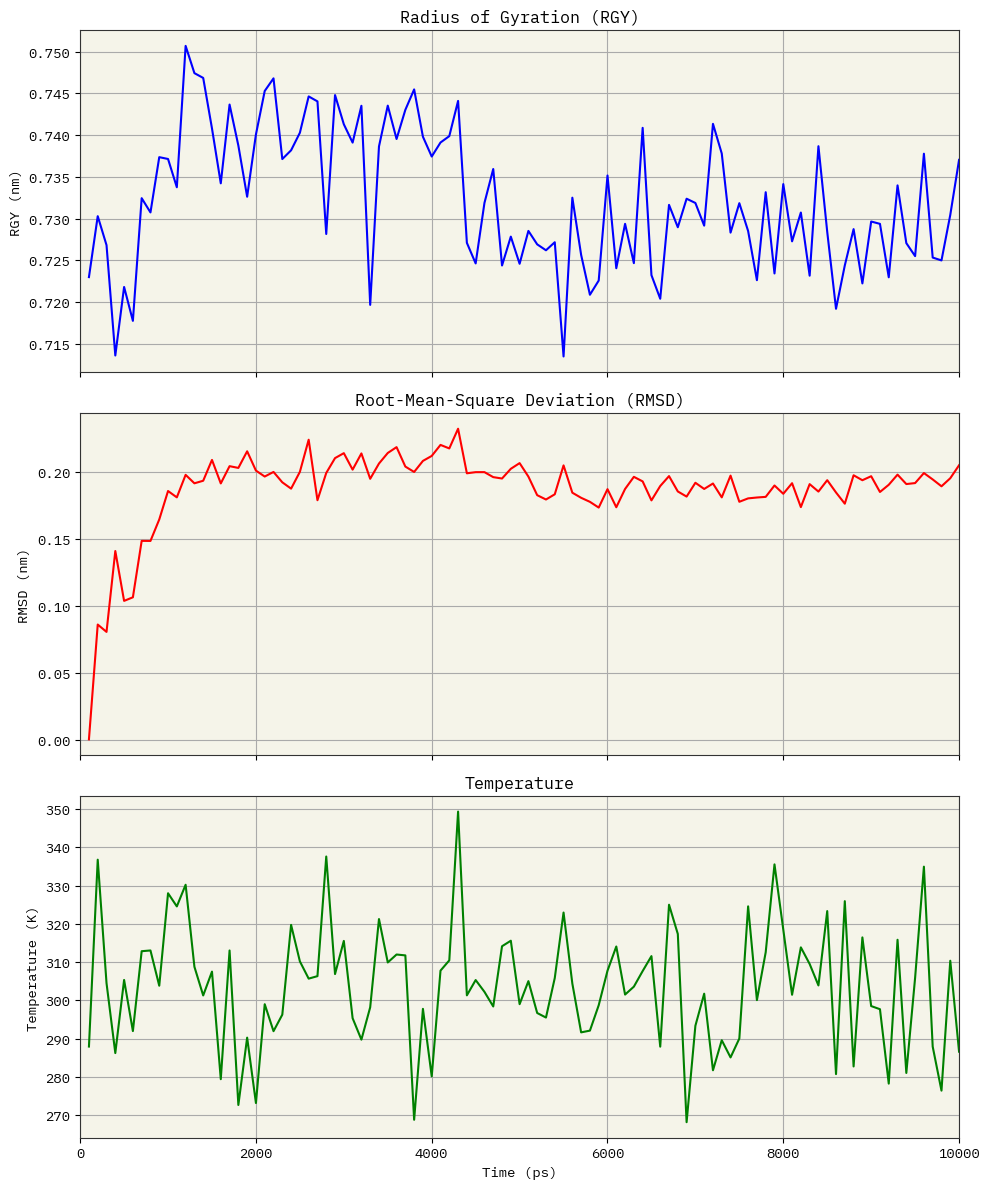

In [36]:
# Plot RGY, RMSD, and Temperature with consistent axes for RGY and RMSD
# Load the provided CSV files
rgy_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/figures/radii_of_gyration_rec0_124452.csv'
rmsd_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/records/rmsd_124452.csv'
log_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/records/LOG_sim0_124452_1L2Y_124445_20241015_124452.txt'
# Reading the CSV files
rgy_data = pd.read_csv(rgy_file_path)
rmsd_data = pd.read_csv(rmsd_file_path)
temperature_data = pd.read_csv(log_file_path,sep='\t')
# temperature_data = temperature_data['Temperature (K)'] # Plotting the RGY (top panel) and RMSD (bottom panel)
temperature_data.columns = temperature_data.columns.str.replace('#"', '').str.replace('"', '')
time_ps = 0.002*temperature_data['Step']
print(len(time_ps))
print(len(rgy_data.index))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot RGY in the top frame (keeping original axis)
ax1.plot(time_ps, rgy_data.iloc[:, 0], color='blue')

ax1.set_title('Radius of Gyration (RGY)')
ax1.set_ylabel('RGY (nm)')
ax1.set_xlim([0, time_ps.iloc[-1]])  # Ensure same axis length as before
ax1.grid(True)

# Plot RMSD in the middle frame (keeping original axis)
ax2.plot(time_ps, rmsd_data.iloc[:, 0], color='red')
ax2.set_title('Root-Mean-Square Deviation (RMSD)')
ax2.set_ylabel('RMSD (nm)')
ax2.set_xlim([0, time_ps.iloc[-1]])  # Ensure same axis length as before
ax2.grid(True)

# Plot Temperature in the bottom frame
ax3.plot(time_ps,temperature_data['Temperature (K)'], color='green')
ax3.set_title('Temperature')
ax3.set_xlabel('Time (ps)')
ax3.set_ylabel('Temperature (K)')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [6]:
agent_wo_solvent.run("Now that the simulation is done, please analyze the trajectory and provide a report with the RMSD and Radius of gyration of the protein")

Thought: To analyze the trajectory and provide a report with the RMSD and Radius of gyration of the protein, I need to perform the following steps:
1. Compute the RMSD of the protein trajectory.
2. Compute the Radius of Gyration for each frame of the trajectory.
3. Summarize the results in a report.

First, I will compute the RMSD of the protein trajectory.

Action:
```
{
  "action": "ComputeRMSD",
  "action_input": {
    "top_id": "topology_file_id",  // Replace with actual topology file ID
    "traj_id": "trajectory_file_id" // Replace with actual trajectory file ID
  }
}
```Question: How can I analyze the trajectory and provide a report with the RMSD and Radius of gyration of the protein?
Thought: To analyze the trajectory and provide a report with the RMSD and Radius of gyration of the protein, I need to perform the following steps:
1. Compute the RMSD of the protein trajectory.
2. Compute the Radius of Gyration for each frame of the trajectory.
3. Summarize the results in a report

/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


The RMSD calculation has been successfully completed, and the results have been saved. Next, I will compute the Radius of Gyration for each frame of the trajectory.

Action:
```
{
  "action": "RadiusofGyrationPerFrame",
  "action_input": {
    "traj_file": "rec0_124452",
    "top_file": "top_sim0_124452"
  }
}
```


/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


The RMSD and Radius of Gyration calculations have been successfully completed. The results have been saved as follows:
- RMSD results: `rmsd_124452.csv`
- RMSD plot: `fig0_130539.png`
- Radii of Gyration results: `rgy_rec0_124452.csv`

I will now summarize these results in a report.

Action:
```
{
  "action": "Final Answer",
  "action_input": "The analysis of the trajectory has been completed. The RMSD and Radius of Gyration of the protein have been calculated. The results are as follows:\n\n1. RMSD:\n- Results saved in: rmsd_124452.csv\n- Plot saved in: fig0_130539.png\n\n2. Radius of Gyration:\n- Results saved in: rgy_rec0_124452.csv\n\nYou can find the detailed results in the respective files."
}
```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

## Simulated annealing from previous simulation

In [8]:
agent_wo_solvent.run("Please modify the simulation you just made to make a simulated annealing, simulate at 303 K for 3 ns, then go to 498K and simulate there for 2 ns, then return to 303 K and simulate for 3 extra ns. \
          Make sure the record are kept every 5000 steps. For the temperature change, use an adequate protocol so that the change is not abrupt")

Thought: I need to modify the simulation script to perform simulated annealing with the specified temperature changes and simulation durations. The recording interval should be set to every 5000 steps. I will use the `ModifyScriptTool` to achieve this.

Action:
```
{
    "action": "ModifyScriptTool",
    "action_input": {
        "script_id": "previous_simulation_script_id",
        "query": "Modify the simulation to perform simulated annealing: simulate at 303 K for 3 ns, then increase to 498 K and simulate for 2 ns, then return to 303 K and simulate for 3 extra ns. Ensure the temperature change is gradual and records are kept every 5000 steps."
    }
}
```Thought: I need to first identify the correct script ID for the previous simulation script. Once I have the correct script ID, I can proceed to modify the script for the simulated annealing process as specified.

Action:
```
{
    "action": "ListRegistryPaths",
    "action_input": {
        "paths": "paths"
    }
}
```I have identif

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

### Uploading files from simulated annealing

In [9]:
agent_with_new_files = MDAgent(agent_type=agent_type, model=llm_var, top_k_tools=tools,ckpt_dir="ckpt_468" ,
                               uploaded_files=[('/Users/jorgemedina/Desktop/md-agent/mdagent/log.txt',"Log file of the records for Temperature, Energy, etc of the simulation"),
                                                                                         ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.pdb','PDB trajectory records in pdb format'),
                                                                                         ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.dcd','trajectory of the simulation in dcd format'),
                                                                                         ('/Users/jorgemedina/Desktop/md-agent/mdagent/simulation_initial_positions.pdb','Initial positions of the simulation in pdb format')])

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/log.txt', 'Log file of the records for Temperature, Energy, etc of the simulation')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/log.txt with ID UPL_020241015_175029

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.pdb', 'PDB trajectory records in pdb format')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.pdb with ID UPL_120241015_175029

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.dcd', 'trajectory of the simulation in dcd format')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.dcd with ID UPL_220241015_175029

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/simulation_initial_positions.pdb', 'Initial positions of the simulation in pdb format')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/simulation_initial_positions.pdb with ID UPL_320241015_1

### Analysis and plots from simulated annealing simulation

In [10]:
agent_with_new_files.run("I just upload the files from the simulated annealing simulation you made for me, please analyze the results.\
                            I would like to know the RMSD and Radius of gyration of the protein")

Thought: To analyze the results of the simulated annealing simulation, I need to compute the RMSD and the Radius of Gyration of the protein. First, I will list the available files to identify the trajectory and topology files needed for the analysis.

Action:
```
{
    "action": "ListRegistryPaths",
    "action_input": {
        "paths": "paths"
    }
}
```Thought: I have identified the relevant files from the registry. To analyze the results of the simulated annealing simulation, I will first compute the RMSD using the trajectory and topology files. After that, I will compute the Radius of Gyration.

Action:
```
{
    "action": "ComputeRMSD",
    "action_input": {
        "top_id": "UPL_320241015_175029",
        "traj_id": "UPL_220241015_175029"
    }
}
```Calculating RMSD...
Data saved to /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/records/rmsd_UPL_320241015_175029.csv
Plot saved to /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/figures/FIG_rmsd_UPL_320241015_175029_2024101

/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


To complete the analysis, I will now compute the Radius of Gyration for the protein using the provided trajectory and topology files.

Action:
```
{
    "action": "RadiusofGyrationPlot",
    "action_input": {
        "traj_file": "UPL_220241015_175029",
        "top_file": "UPL_320241015_175029"
    }
}
```plot_name:  FIG_rgy_UPL_220241015_175029_20241015_175051.png


/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


To provide a comprehensive analysis of the simulated annealing simulation, I have computed both the RMSD and the Radius of Gyration for the protein. Here are the results:

1. **RMSD (Root Mean Square Deviation)**:
   - The RMSD was calculated and saved to a CSV file with the file ID: `rmsd_UPL_320241015_175029`.
   - A plot of the RMSD was generated and saved with the plot ID: `fig0_175048`.

2. **Radius of Gyration**:
   - The Radius of Gyration was calculated for each frame of the trajectory.
   - A plot of the Radius of Gyration was generated and saved with the plot ID: `fig0_175051`.

You can refer to the plots for a visual representation of the RMSD and Radius of Gyration over the course of the simulation.

Final Answer: The RMSD and Radius of Gyration for the protein have been successfully computed. The results are saved as follows:
- RMSD CSV file: `rmsd_UPL_320241015_175029`
- RMSD Plot: `fig0_175048`
- Radius of Gyration Plot: `fig0_175051`

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 350x291.667 with 0 Axes>

802
802


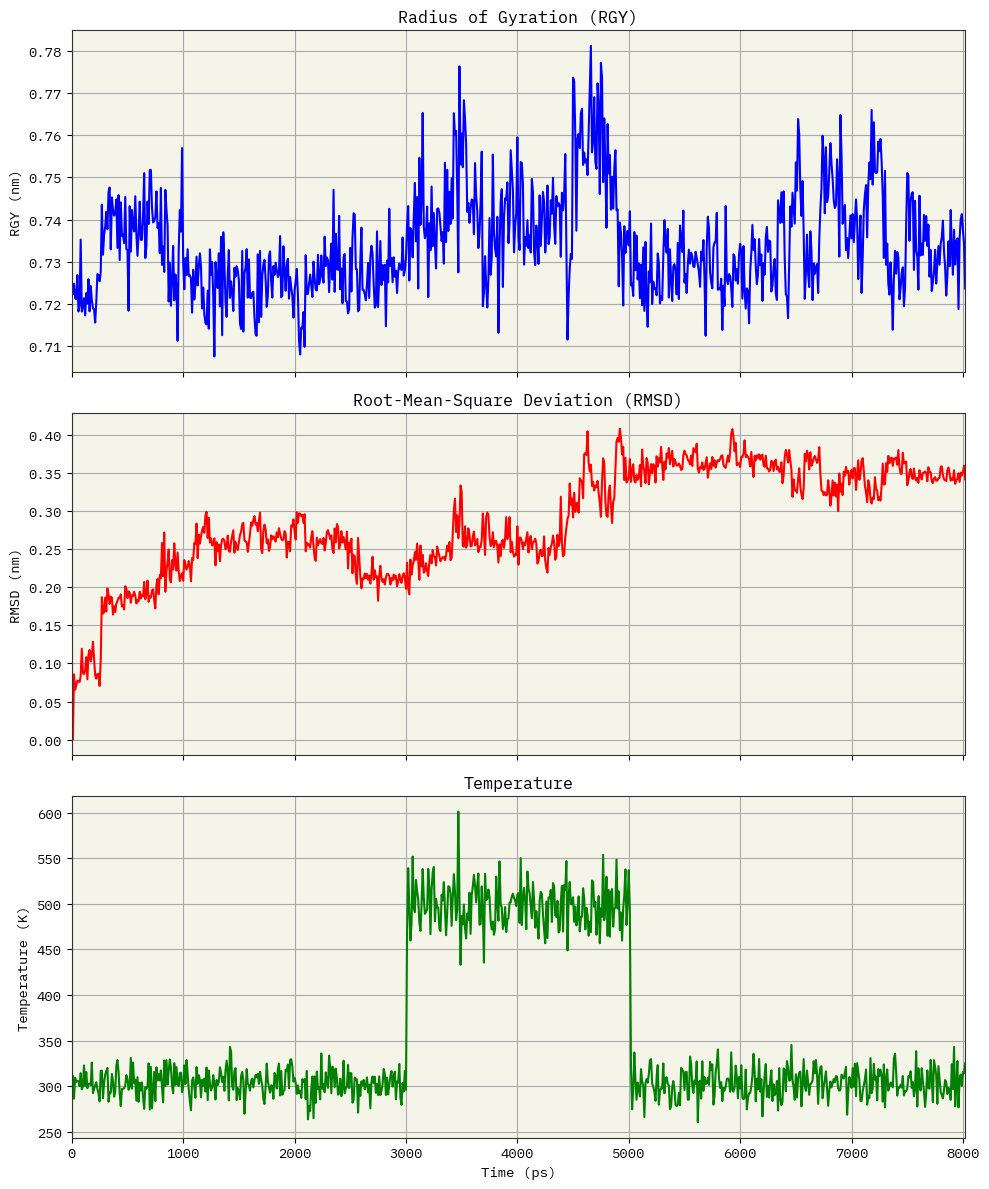

In [11]:
# Plot RGY, RMSD, and Temperature with consistent axes for RGY and RMSD
# Load the provided CSV files
rgy_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/figures/radii_of_gyration_UPL_220241015_175029.csv'
rmsd_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_468/records/rmsd_UPL_320241015_175029.csv'
log_file_path = '/Users/jorgemedina/Desktop/md-agent/mdagent/log.txt'
# Reading the CSV files
rgy_data = pd.read_csv(rgy_file_path)
rmsd_data = pd.read_csv(rmsd_file_path)
temperature_data = pd.read_csv(log_file_path,sep='\t')
# temperature_data = temperature_data['Temperature (K)'] # Plotting the RGY (top panel) and RMSD (bottom panel)
temperature_data.columns = temperature_data.columns.str.replace('#"', '').str.replace('"', '')
time_ps = 0.002*temperature_data['Step']
print(len(time_ps))
print(len(rgy_data.index))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot RGY in the top frame (keeping original axis)
ax1.plot(time_ps, rgy_data.iloc[:, 0], color='blue')

ax1.set_title('Radius of Gyration (RGY)')
ax1.set_ylabel('RGY (nm)')
ax1.set_xlim([0, time_ps.iloc[-1]])  # Ensure same axis length as before
ax1.grid(True)

# Plot RMSD in the middle frame (keeping original axis)
ax2.plot(time_ps, rmsd_data.iloc[:, 0], color='red')
ax2.set_title('Root-Mean-Square Deviation (RMSD)')
ax2.set_ylabel('RMSD (nm)')
ax2.set_xlim([0, time_ps.iloc[-1]])  # Ensure same axis length as before
ax2.grid(True)

# Plot Temperature in the bottom frame
ax3.plot(time_ps,temperature_data['Temperature (K)'], color='green')
ax3.set_title('Temperature')
ax3.set_xlabel('Time (ps)')
ax3.set_ylabel('Temperature (K)')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Simulated annealing without user guidance

In [30]:
agent = MDAgent(agent_type=agent_type, model=llm_var, top_k_tools=tools)
agent.run("Please run a simulated annealing simulation of the protein 1L2Y in vaccuum. First set it up, and then modify the given script to simulate at 303 K for 3 ns (3000ps), then go to 498K and simulate there for 2 ns, then return to 303 K and simulate for 3 extra ns. \
          Make sure the record are kept every 5000 steps. For the temperature change, use an adequate protocol so that the change is not abrupt")

Thought: To perform the simulated annealing simulation of the protein 1L2Y in vacuum, I will first set up a basic simulation script using the provided tools. Then, I will modify the script to include the specific temperature changes and simulation times as requested.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1L2Y",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "303 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 5000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```
Setting default forcefields v2
Thought: I need to down

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [33]:
agent_with_new_files = MDAgent(agent_type=agent_type, model=llm_var, top_k_tools=tools,ckpt_dir="ckpt_474" ,
                               uploaded_files=[('/Users/jorgemedina/Desktop/md-agent/mdagent/log.txt',"Log file of the records for Temperature, Energy, etc of the simulation"),
                                                                                         ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.pdb','PDB trajectory records in pdb format')
                                                                                        ,  ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.dcd','trajectory of the simulation in dcd format')
                                                                                        ,  ('/Users/jorgemedina/Desktop/md-agent/mdagent/simulation_initial_positions.pdb','Initial positions of the simulation in pdb format')])
agent_with_new_files.run("I just upload the files from the simulated annealing simulation you made for me, please analyze the results.\
                            I would like to know the RMSD and Radius of gyration of the protein")

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/log.txt', 'Log file of the records for Temperature, Energy, etc of the simulation')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/log.txt with ID UPL_020241016_132440

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.pdb', 'PDB trajectory records in pdb format')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.pdb with ID UPL_120241016_132440

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.dcd', 'trajectory of the simulation in dcd format')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/trajectory.dcd with ID UPL_220241016_132440

Adding file ('/Users/jorgemedina/Desktop/md-agent/mdagent/simulation_initial_positions.pdb', 'Initial positions of the simulation in pdb format')

<class 'tuple'>
Adding file /Users/jorgemedina/Desktop/md-agent/mdagent/simulation_initial_positions.pdb with ID UPL_320241016_1

/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


To complete the analysis, I will now calculate the Radius of Gyration for the protein using the same trajectory and topology files.

Action:
```
{
    "action": "RadiusofGyrationPlot",
    "action_input": {
        "traj_file": "UPL_220241016_132440",
        "top_file": "UPL_320241016_132440"
    }
}
```plot_name:  FIG_rgy_UPL_220241016_132440_20241016_132446.png


/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


To provide a comprehensive analysis of the simulated annealing simulation, I have calculated both the RMSD and the Radius of Gyration for the protein. Here are the results:

1. **RMSD (Root Mean Square Deviation):**
   - The RMSD calculation has been completed and saved to a CSV file.
   - A plot of the RMSD has also been generated.

2. **Radius of Gyration:**
   - The Radius of Gyration calculation has been completed.
   - A plot of the Radius of Gyration has been generated.

You can find the plots and CSV files for detailed analysis.

Final Answer: The RMSD and Radius of Gyration for the protein have been successfully calculated. The results are saved in the following files:
- RMSD CSV file: `rmsd_UPL_320241016_132440`
- RMSD Plot: `fig0_132444`
- Radius of Gyration Plot: `FIG_rgy_UPL_220241016_132440_20241016_132446.png`

These files contain the detailed analysis of the simulated annealing simulation.

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 350x291.667 with 0 Axes>

800
800


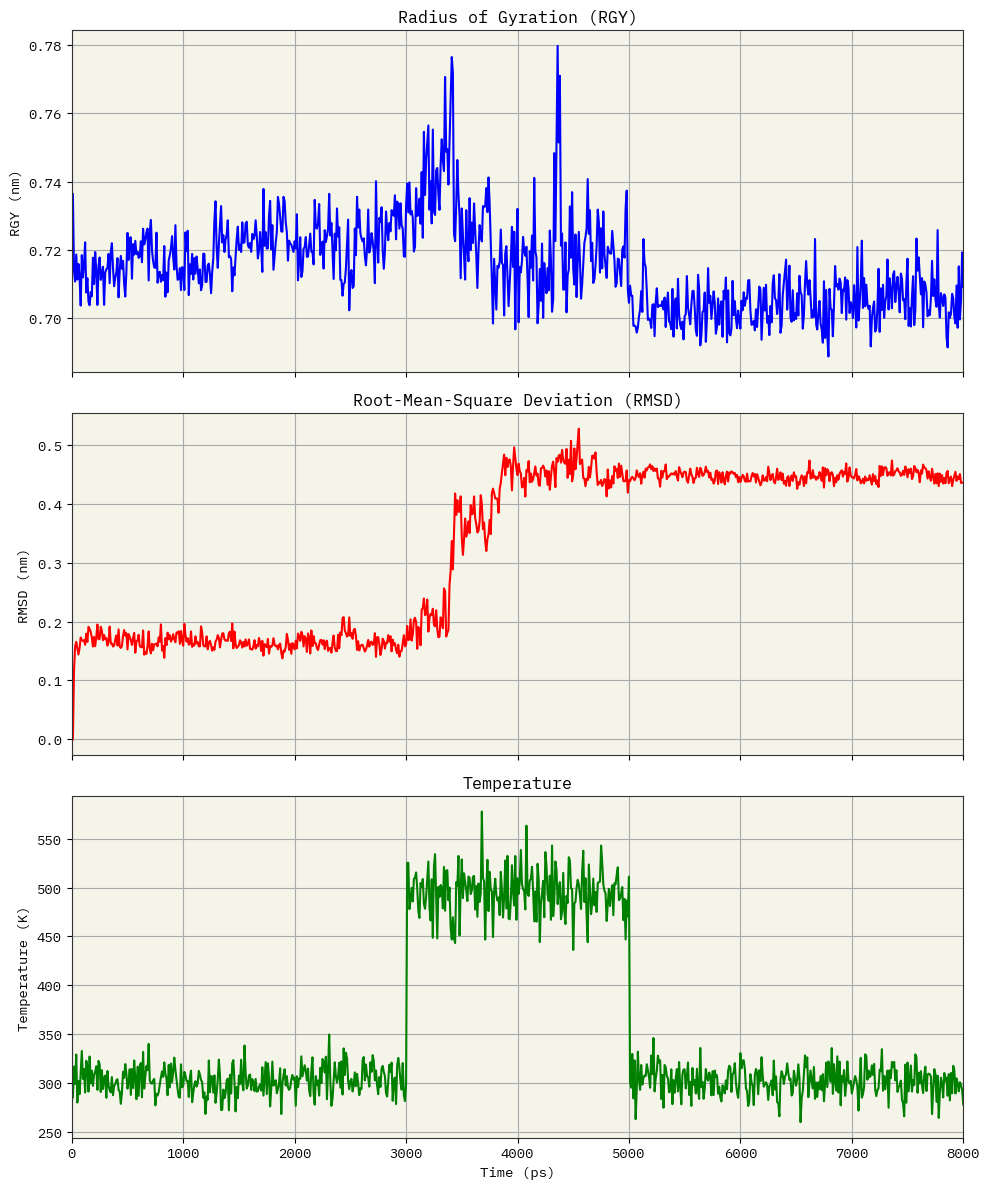

In [34]:
# Plot RGY, RMSD, and Temperature with consistent axes for RGY and RMSD
# Load the provided CSV files
rgy_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_474/figures/radii_of_gyration_UPL_220241016_132440.csv'
rmsd_file_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_474/records/rmsd_UPL_320241016_132440.csv'
log_file_path = '/Users/jorgemedina/Desktop/md-agent/mdagent/log.txt'
# Reading the CSV files
rgy_data = pd.read_csv(rgy_file_path)
rmsd_data = pd.read_csv(rmsd_file_path)
temperature_data = pd.read_csv(log_file_path,sep='\t')
# temperature_data = temperature_data['Temperature (K)'] # Plotting the RGY (top panel) and RMSD (bottom panel)
temperature_data.columns = temperature_data.columns.str.replace('#"', '').str.replace('"', '')
time_ps = 0.002*temperature_data['Step']
print(len(time_ps))
print(len(rgy_data.index))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot RGY in the top frame (keeping original axis)
ax1.plot(time_ps, rgy_data.iloc[:, 0], color='blue')

ax1.set_title('Radius of Gyration (RGY)')
ax1.set_ylabel('RGY (nm)')
ax1.set_xlim([0, time_ps.iloc[-1]])  # Ensure same axis length as before
ax1.grid(True)

# Plot RMSD in the middle frame (keeping original axis)
ax2.plot(time_ps, rmsd_data.iloc[:, 0], color='red')
ax2.set_title('Root-Mean-Square Deviation (RMSD)')
ax2.set_ylabel('RMSD (nm)')
ax2.set_xlim([0, time_ps.iloc[-1]])  # Ensure same axis length as before
ax2.grid(True)

# Plot Temperature in the bottom frame
ax3.plot(time_ps,temperature_data['Temperature (K)'], color='green')
ax3.set_title('Temperature')
ax3.set_xlabel('Time (ps)')
ax3.set_ylabel('Temperature (K)')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [35]:
import mdtraj as md
import nglview as nv
traj = md.load('trajectory.dcd',top="simulation_initial_positions.pdb")
view = nv.show_mdtraj(traj)
view 

/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:206: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


NGLWidget(max_frame=799)

# Unsuccesful examples

In [25]:
agent = MDAgent(agent_type=agent_type, model=llm_var, top_k_tools=tools)
agent.run("Please run a simulated annealing simulation of the protein 1L2Y in vaccuum. First set it up, and then modify the given script to simulate at 303 K for 3 ns (3000ps), then go to 498K and simulate there for 2 ns, then return to 303 K and simulate for 3 extra ns. \
          Make sure the record are kept every 5000 steps. For the temperature change, use an adequate protocol so that the change is not abrupt")

Thought: To run a simulated annealing simulation of the protein 1L2Y in vacuum, I will first set up a short simulation using the `SetUpandRunFunction` tool. Then, I will modify the generated script to include the specified temperature changes and simulation durations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1L2Y",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "303 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 5000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```
Setting default forcefields v2
Thought: I need to dow

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro